In [1]:
import numpy as np 
X=np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

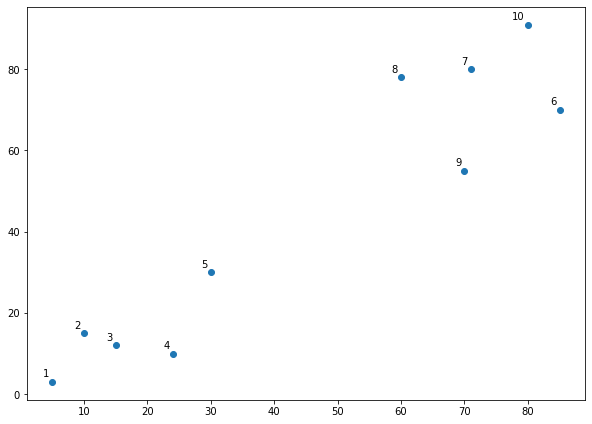

In [2]:
import matplotlib.pyplot as plt 
labels=range(1,11)
plt.figure(figsize=(10,7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1],label="True Position")

for label, x, y in zip(labels,X[:,0],X[:,1]):
    plt.annotate(
    label,
    xy=(x,y),xytext=(-3,3),
    textcoords="offset points",ha="right",va="bottom");


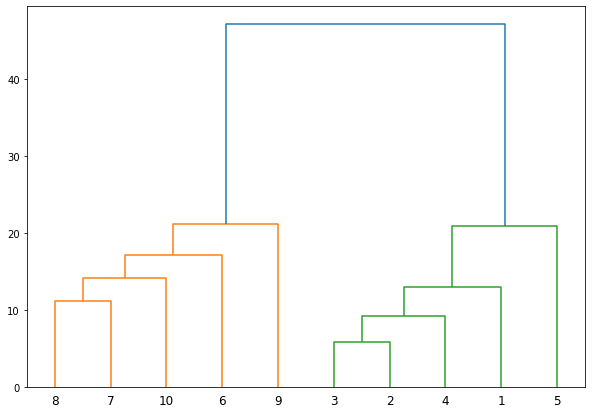

In [5]:
from scipy.cluster.hierarchy import dendrogram,linkage
from matplotlib import pyplot as plt 
linked=linkage(X,"single")
labelList=range(1,11)
plt.figure(figsize=(10,7))
dendrogram(linked,orientation="top",
          labels=labelList,
          distance_sort="descending",show_leaf_counts=True);

In [6]:
import numpy as np 
import pylab as pl 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
from sklearn.utils import shuffle 
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

In [8]:
anime=pd.read_csv("anime.csv")
#rating=pd.read_csv("rating.csv")

In [20]:
pd.set_option("display.max_rows",None)

In [28]:
rating.tail()

,user_id,anime_id,rating
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9
7813736,73516,8074,9


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


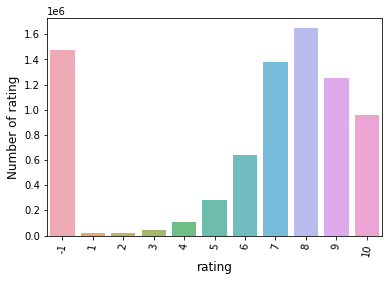

In [35]:
cnt_pro=rating['rating'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(cnt_pro.index,cnt_pro.values,alpha=0.8)
plt.ylabel('Number of rating',fontsize=12)
plt.xlabel('rating',fontsize=12);
plt.xticks(rotation=80);

In [47]:
Mean_rate=rating.groupby(["user_id"]).mean().reset_index()
Mean_rate['mean_rating']=Mean_rate['rating']
Mean_rate.drop(["anime_id",'rating'],axis=1,inplace=True)

In [49]:
Mean_rate.sample(5)

,user_id,mean_rating
67018,67020,9.818182
40422,40423,7.843750
24625,24626,7.818182
37319,37320,9.388889
13698,13699,8.000000


In [54]:
user=pd.merge(rating,Mean_rate,on=["user_id","user_id"])
user.shape

(7813737, 4)

In [57]:
user=user.drop(user[user.rating < user.mean_rating].index)


(4262566, 4)

In [64]:
Data=pd.merge(anime,user,on=["anime_id","anime_id"])
Data=Data[Data.user_id <= 10000]


(570939, 10)

In [66]:
len(Data["anime_id"].unique())

7040

In [68]:
len(Data["user_id"].unique())

10000

In [10]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [9]:
raw_df=pd.read_csv('CC GENERAL.csv')
raw_df=raw_df.drop("CUST_ID",axis=1)
raw_df.fillna(method="ffill",inplace=True)

In [10]:
raw_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,48.886365,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [15]:
#standardize data
scaler=StandardScaler()
scaled_df=scaler.fit_transform(raw_df)
#normalizing the data
normalized_df=normalize(scaled_df)
#converting the numpy array into a pandas Dataframe
normalized_df=pd.DataFrame(normalized_df)
#reducing the dimensions  of the data
pca=PCA(n_components=2)
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 


,0,1
0,-0.489949,-0.679976
1,-0.519099,0.544826
2,0.330633,0.268880
3,-0.481656,-0.097611
4,-0.563512,-0.482506
...,...,...
8945,0.328693,-0.198293
8946,0.259752,-0.176867
8947,0.188818,-0.248155
8948,-0.313093,-0.171112
